tensor([[ 1.9269,  1.4873,  0.9007, -2.1055,  0.6784],
        [-1.2345, -0.0431, -1.6047, -0.7521, -0.6866],
        [-0.4934,  0.2415, -1.1109,  0.0915, -2.3169],
        [-0.2168, -1.3847, -0.3957,  0.8034, -0.6216],
        [-0.5920, -0.0631, -0.8286,  0.3309, -1.5576]], requires_grad=True) tensor([[ 0.0000,  1.4873,  0.9007, -2.1055,  0.6784],
        [-1.2345,  0.0000, -1.6047, -0.7521, -0.6866],
        [-0.4934,  0.2415,  0.0000,  0.0915, -2.3169],
        [-0.2168, -1.3847, -0.3957,  0.0000, -0.6216],
        [-0.5920, -0.0631, -0.8286,  0.3309,  0.0000]], grad_fn=<SubBackward0>) tensor([[ 1.9269,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000, -0.0431,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000, -1.1109,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.8034,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000, -1.5576]], grad_fn=<DiagBackward>)


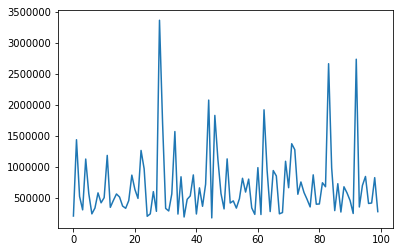

tensor([[ 1.8601,  1.4873,  0.9007, -2.1055,  0.6784],
        [-1.2345, -0.1248, -1.6047, -0.7521, -0.6866],
        [-0.4934,  0.2415, -1.1912,  0.0915, -2.3169],
        [-0.2168, -1.3847, -0.3957,  0.7152, -0.6216],
        [-0.5920, -0.0631, -0.8286,  0.3309, -1.6528]], requires_grad=True) tensor([[ 0.0000,  1.4873,  0.9007, -2.1055,  0.6784],
        [-1.2345,  0.0000, -1.6047, -0.7521, -0.6866],
        [-0.4934,  0.2415,  0.0000,  0.0915, -2.3169],
        [-0.2168, -1.3847, -0.3957,  0.0000, -0.6216],
        [-0.5920, -0.0631, -0.8286,  0.3309,  0.0000]], grad_fn=<SubBackward0>) tensor([[ 1.9269,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000, -0.0431,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000, -1.1109,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.8034,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000, -1.5576]], grad_fn=<DiagBackward>)
tensor([[0.4020],
        [0.6421],
        [0.2163],
        [0.2556],
        [0.3793]], grad_fn=<Copy

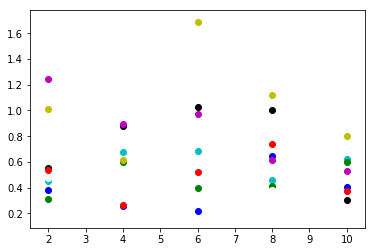

In [42]:
import torch
import torch.optim as optim
import torch.nn as nn
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

torch.manual_seed(42)
p = torch.tensor([10,8,6,4,2],dtype=torch.float)
p1=torch.diag(p)
n=5
tao=100
dt = 1e-3
T=int(10/dt)
B=10
w=torch.randn(n,n, device='cpu', requires_grad=True,dtype=torch.float)
w1=torch.diag(w)
w_rec=torch.diag(w1)
w1_rec = w-w_rec
lr = 1e-3
n_epochs = 100
optimizer = optim.Adam([w], lr=lr)
V=torch.zeros(T,n)
ep=np.arange(n_epochs)
Loss=torch.zeros(n_epochs,)

print (w,w1_rec,w_rec)

for epoch in range(n_epochs):
    z=torch.randn(1,n)
    loss=0
    for t in range(T):
        N=torch.randn(1,n)
        z_dot=(-z+(z@w_rec)/math.sqrt(n))
        z = z + z_dot*dt+N*math.sqrt(dt)
        loss = loss + ((z@p1)**2).mean()
    
    
    loss.backward()       
    optimizer.step()
    optimizer.zero_grad()
    Loss[epoch]=loss
 
plt.plot(ep,Loss.detach().numpy())
plt.show()


print (w,w1_rec,w_rec)

color=['b','c','k','g','w','m','r','y']
for a in range(8):
    z=torch.randn(1,n)
    Z=torch.zeros(T,n)
    for t in range(T):
        N=torch.randn(1,n)
        z_dot=(-z+(z@w1_rec)/math.sqrt(n))
        z = z + z_dot*dt+N*math.sqrt(dt)
        #q= int(t-T/2)
        Z[t] = z
        Z_split = torch.split(Z,int(T/2),dim=1)
        
  
    V=torch.zeros(n,1)

    for i in range(n):
        V[i]=torch.var(Z[:,i])
    print (V)
    
    plt.scatter(p,V.detach().numpy(),color=color[a])
    


                
plt.show()  



    
    
#plt.plot(p,V.detach().numpy(), 'r--', p, V2.detach().numpy(), 'bs', p, V.detach().numpy(), 'g^')
#plt.show()






In [5]:
import torch
x = torch.rand(1, 5)
print (x,x[3:5])

tensor([[0.7681, 0.2223, 0.8163, 0.8147, 0.5370]]) tensor([], size=(0, 5))


In [32]:
lr.requires_grad


AttributeError: 'float' object has no attribute 'requires_grad'

In [9]:
a = torch.randn(1, 8) #tensor of size 50 x 80
b = torch.split(a, 40, dim=1) # it returns a tuple
b = list(b)
print (b)

[tensor([[ 1.0190,  1.9208, -1.3950, -1.5837, -0.4988, -0.2477,  0.8223,  1.8248]])]


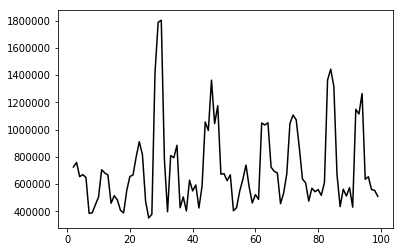

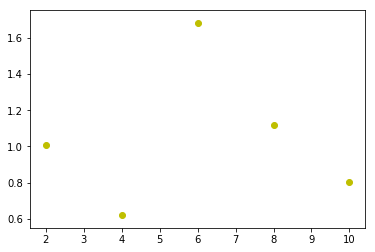

In [41]:
import pandas as pd

df=pd.DataFrame(Loss.detach().numpy())
rolling_mean = df.rolling(window=3).mean()
plt.plot(ep, rolling_mean, label='Learning Curve', color='k')
plt.show()
plt.scatter(p,V.detach().numpy(),color=color[a])
                   
plt.show()  